## Plotly and Cufflinks
Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images).

## Installation
In order for this all to work, you'll need to install plotly and cufflinks to call plots directly off of a pandas dataframe. These libraries are not currently available through conda but are available through pip. Install the libraries at your command line/terminal using:

pip install plotly

pip install cufflinks

** NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work. **

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

5.7.0


In [3]:
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

In [13]:
df=pd.read_csv('ds_salaries.csv')

In [16]:
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [18]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [56]:
df['experience_level'] = df['experience_level'].replace('EN','Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-Level')
df['experience_level'] = df['experience_level'].replace('SE','Senior')
df['experience_level'] = df['experience_level'].replace('EX','Director')

In [57]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid-Level,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Senior,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Senior,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Mid-Level,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Senior,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## 10 Most Popular Jop Tittles

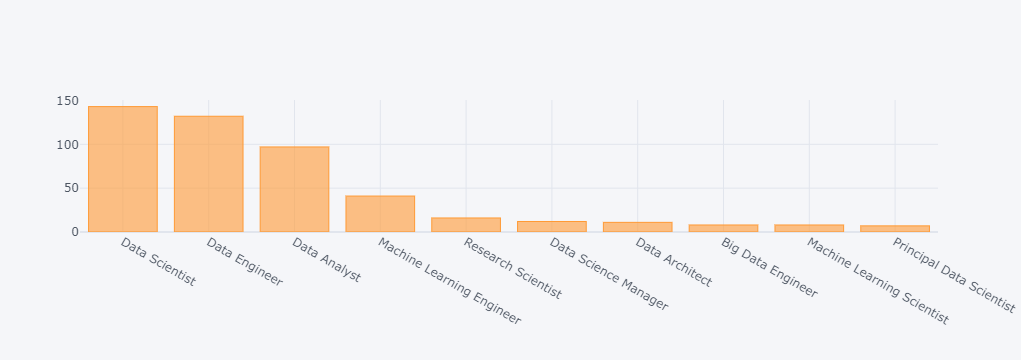

In [58]:
def top_ten_job():
    df['job_title'].value_counts().head(10).iplot(kind='bar')
    plt.show()
top_ten_job()    

## Average Incomes Accordoing to Experience Level

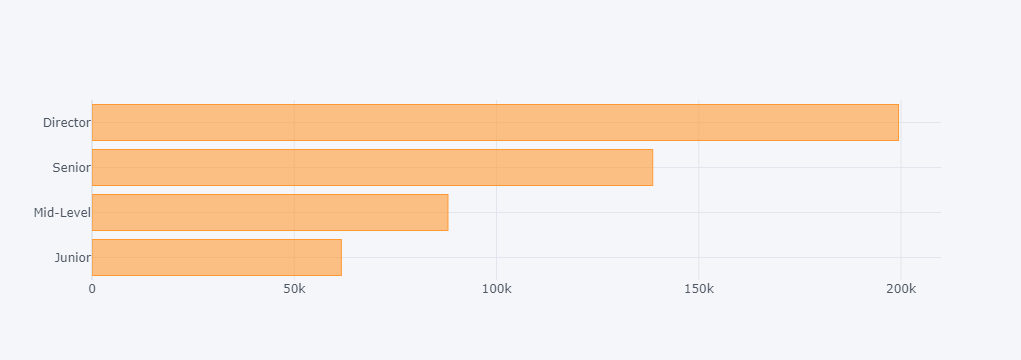

In [59]:
df.groupby('experience_level')['salary_in_usd'].mean().sort_values(ascending=True).iplot(kind='barh')

## Company Locations

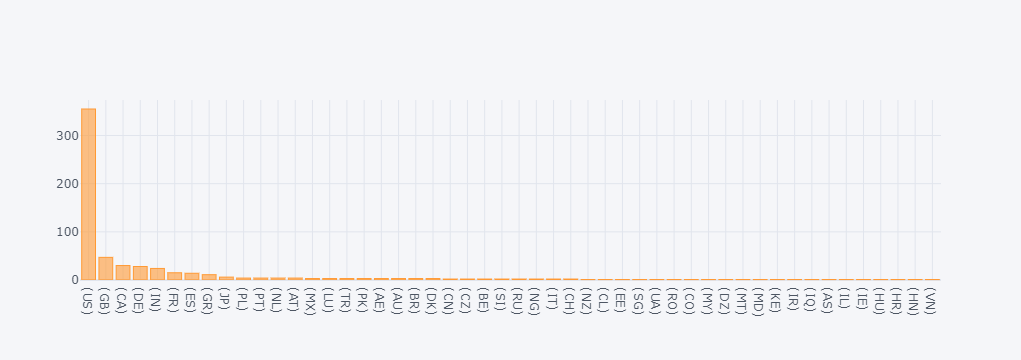

In [66]:
df[['company_location']].value_counts().iplot(kind='bar')

## Salary 

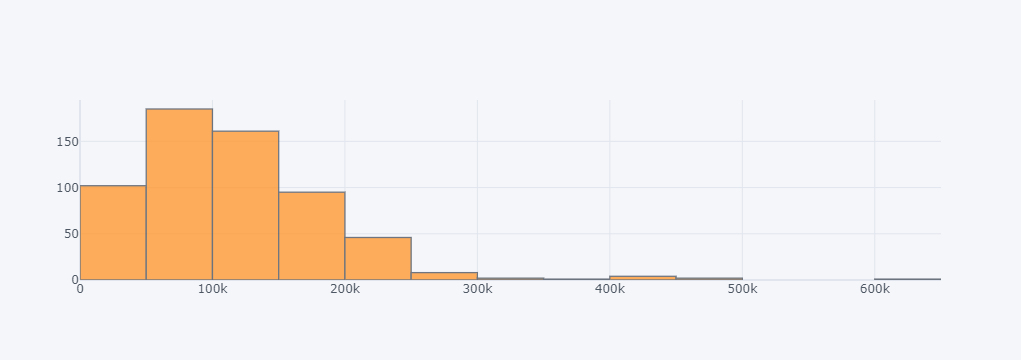

In [67]:
df['salary_in_usd'].iplot(kind='hist',bins=25)

## Most 5 command jobs seeing on Box Plot


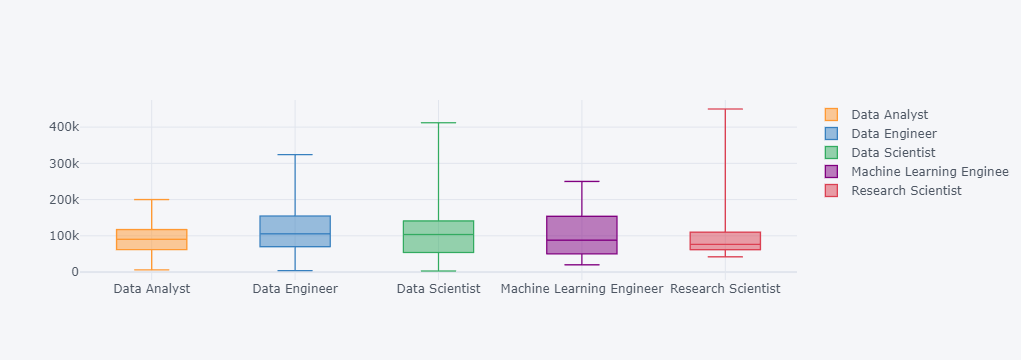

In [98]:
job_list = ["Data Scientist", "Data Analyst","Data Engineer", "Machine Learning Engineer",'Research Scientist']
df_filtered = df[df['job_title'].isin(job_list)]
df_filtered = df_filtered.reset_index(drop=True)

box_age = df_filtered[['job_title','salary_in_usd']]
box_age.pivot(columns='job_title', values='salary_in_usd').iplot(kind='box')